#  Finding the average sizes of user requests for each hour (in kWh) 

1. Group data set by the hour of arrival
2. Calculate average request size for each hour
3. Plot the change dynamic into a graph

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns

In [25]:
#changong data types to datetime format for users table

users_to_clean = pd.read_csv('./data/users.csv')
users_to_clean['Modified'] = pd.to_datetime(users_to_clean.modifiedAt, infer_datetime_format=True)  
users_to_clean['Departure'] = pd.to_datetime(users_to_clean.requestedDeparture, infer_datetime_format=True)
users = users_to_clean.drop(columns = ['requestedDeparture', 'modifiedAt', 'Unnamed: 0'])
users.head()

,WhPerMile,kWhRequested,milesRequested,minutesAvailable,paymentRequired,userID,Modified,Departure
0,350,59.5,170,550,True,22,2018-04-30 15:08:54+00:00,2018-05-01 00:17:49+00:00
1,400,8.0,20,60,True,61,2018-05-07 14:38:32+00:00,2018-05-07 15:38:18+00:00
2,400,8.0,20,648,True,61,2018-05-07 15:40:44+00:00,2018-05-08 01:26:18+00:00
3,400,28.0,70,648,True,61,2018-05-07 15:41:04+00:00,2018-05-08 01:26:18+00:00
4,350,17.5,50,546,True,22,2018-05-11 15:18:23+00:00,2018-05-12 00:23:01+00:00


In [26]:
hours = list(range(24))

In [17]:
users.describe()

,WhPerMile,kWhRequested,milesRequested,minutesAvailable,userID
count,17134.000000,17134.000000,17134.000000,17134.000000,17134.000000
mean,370.274075,21.847404,63.680635,288.012665,1103.289716
std,101.562645,19.655481,57.357672,184.853041,937.954080
min,200.000000,2.000000,10.000000,1.000000,1.000000
25%,295.000000,8.000000,20.000000,130.000000,562.000000
50%,400.000000,16.000000,40.000000,258.000000,838.000000
75%,400.000000,28.000000,80.000000,426.750000,1238.000000
max,600.000000,180.000000,300.000000,1913.000000,6952.000000


## Cleaning the data

In [60]:
users_mistakes = users[users.kWhRequested > 90]
users_mistakes

users_new = users[users.kWhRequested <= 90]
users_new.describe()

,WhPerMile,kWhRequested,milesRequested,minutesAvailable,userID
count,16802.000000,16802.000000,16802.000000,16802.000000,16802.000000
mean,367.703369,20.012871,60.369004,282.080288,1112.140579
std,100.449680,14.603563,52.603160,179.217524,940.598985
min,200.000000,2.000000,10.000000,1.000000,1.000000
25%,292.000000,8.000000,20.000000,129.000000,564.000000
50%,400.000000,16.000000,40.000000,253.000000,850.000000
75%,400.000000,26.900000,80.000000,421.000000,1257.000000
max,600.000000,87.780000,300.000000,1913.000000,6952.000000


## Group data set by the hour of arrival

In [61]:
#a function to slice rows from the users dataframe with sessions started on a certain hour
def requests_by_hour(hour, df = users_new):
    new_df = users_new[users_new.Modified.dt.hour == hour]
    return new_df

#charging[charging.ConnectionTime.dt.hour == 2]

In [62]:
test = requests_by_hour(14)
test.describe()

,WhPerMile,kWhRequested,milesRequested,minutesAvailable,userID
count,536.000000,536.000000,536.000000,536.000000,536.000000
mean,345.147388,19.112836,60.891791,387.027985,859.253731
std,84.424156,13.711977,50.680744,216.282969,930.051826
min,200.000000,4.000000,10.000000,19.000000,61.000000
25%,273.000000,8.000000,20.000000,198.250000,560.000000
50%,325.000000,16.000000,50.000000,456.500000,569.000000
75%,400.000000,23.955000,80.000000,537.000000,841.000000
max,600.000000,75.000000,260.000000,1078.000000,4913.000000


## Calculating average request for each hour

In [63]:
#combining all calculation in one function
def avg_reguest_by_hour(hour, df = users_new):
    new_df = users_new[users_new.Modified.dt.hour == hour]
    avg_charge_request = new_df.kWhRequested.mean()
    return avg_charge_request

In [64]:
avg_reguest_by_hour(10)

46.65761904761904

In [65]:
#calculating avg requests for all hours
def avg_requests(ls):
    result = []
    for i in ls:
        result.append(avg_reguest_by_hour(i))
    return result

In [66]:
requests = avg_requests(hours)

Text(0.5, 1.0, 'Average charge request for one car')

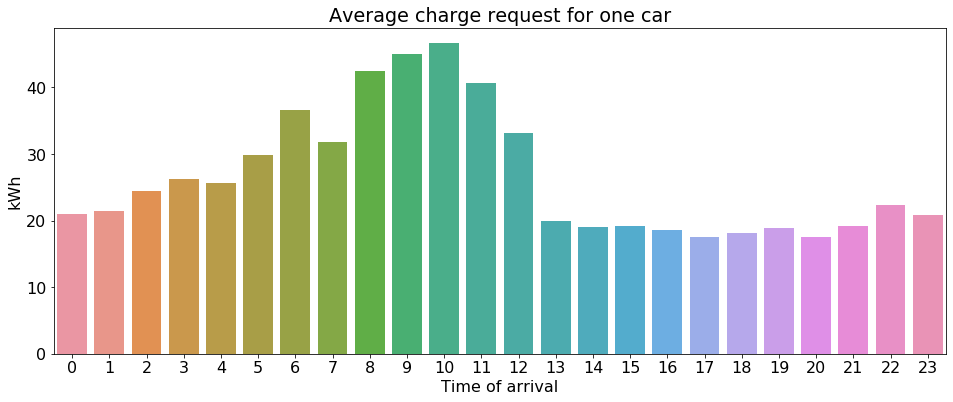

In [110]:
plt.rcParams.update({'font.size': 16})
ax, fig = plt.subplots(figsize = (16, 6))
ax = sns.barplot(x= hours, y=requests)
ax.set_ylabel('kWh')
ax.set_xlabel('Time of arrival')
ax.set_title('Average charge request for one car')

## Exploring data for each hour 

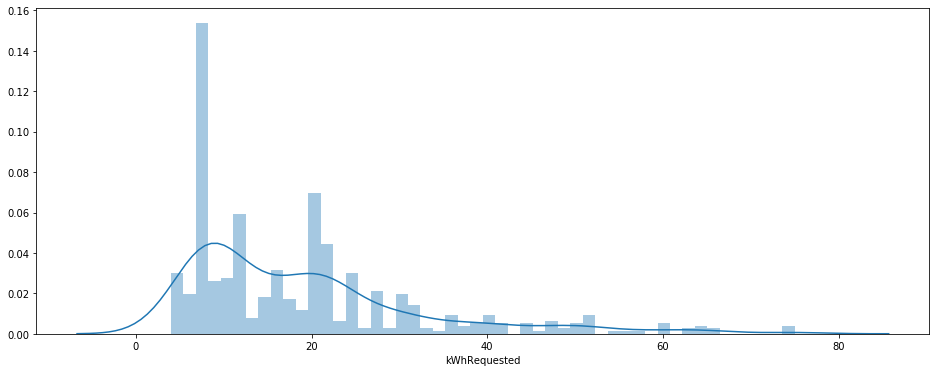

In [76]:
test = requests_by_hour(14)
test.describe()
ax, fig = plt.subplots(figsize = (16, 6))
ax = sns.distplot(test.kWhRequested, bins = 50)

In [104]:
# fig, axs = plt.subplots(24, figsize = (16, 72))
# for i in range(24):
#     data = requests_by_hour(i)
#     x = data.kWhRequested
#     axs[i].hist(x)
#     axs.set_title(i)

    

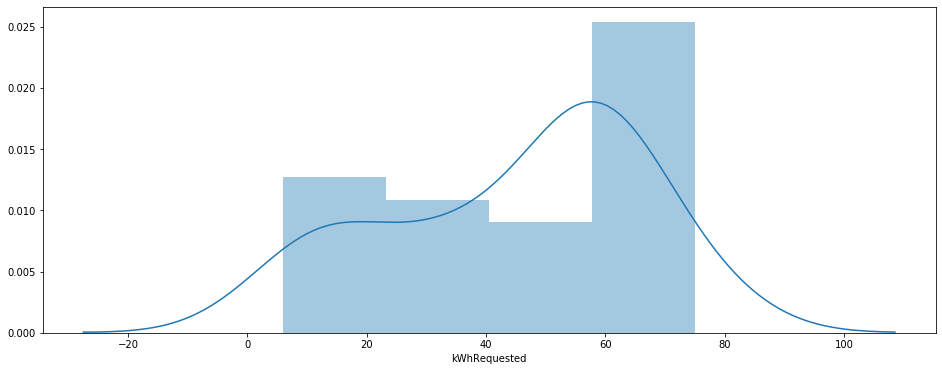

In [82]:
test = requests_by_hour(9)
test.describe()
ax, fig = plt.subplots(figsize = (16, 6))
ax = sns.distplot(test.kWhRequested)

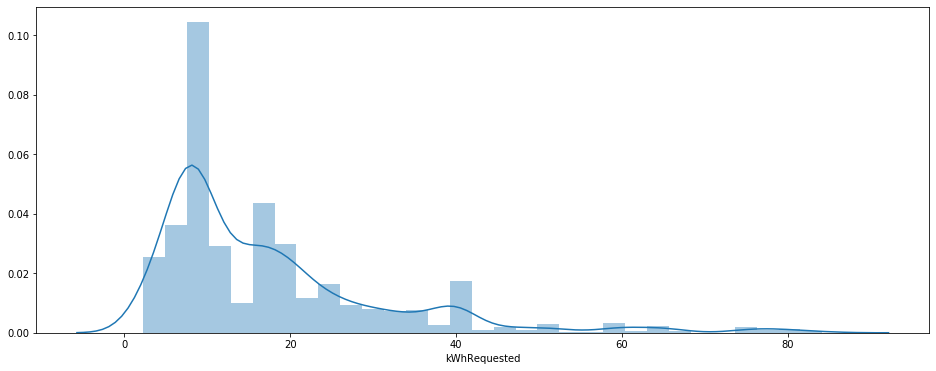

In [84]:
test = requests_by_hour(20)
test.describe()
ax, fig = plt.subplots(figsize = (16, 6))
ax = sns.distplot(test.kWhRequested)